# Sistemas de Aprendizaje Automático - Examen parcial
2024/03/14

## Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
import dtreeviz

ModuleNotFoundError: No module named 'dtreeviz'

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1956)

In [5]:
knn_iris = KNeighborsClassifier(np.sqrt(X_train.shape[0]).astype(int)).fit(X_train, y_train)
y_pred_knn = knn_iris.predict(X_test)

score = np.sum(y_pred_knn==y_test)/len(y_test)

TypeError: 'builtin_function_or_method' object is not subscriptable

>1. ¿Qué parámetro se está pasando al constructor del clasificador? ¿qué función cumple?

Se le está pasando una matriz np que haga una raíz del array x_trainy shape nos permite especificar la forma de la matriz y los valores sean de tipo integer.

>2. ¿Qué información nos da la variable `score`?

Nos da el resultado de predicción que tiene el entrenamiento.Es decir compara las predicciones de el entrenamiento con las predicciones del test y nos da un 0.96 y eso signfica que tiene un acierto del 96%



In [ ]:
log_reg_multi = LogisticRegression().fit(X_train, y_train)
y_pred = log_reg_multi.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

>3. ¿Qué información nos da la variable `mae`? ¿Qué otra métrica sería la apropiada en este caso?

Una forma de calcular el error es usando el error absoluto medio que es la media de los errores absolutos cometidos.
La más apropiada sería utilizar el MSE (error cuadrático medio)que es la media de los errores al cuadrado(mean_squared_error)

In [ ]:
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)


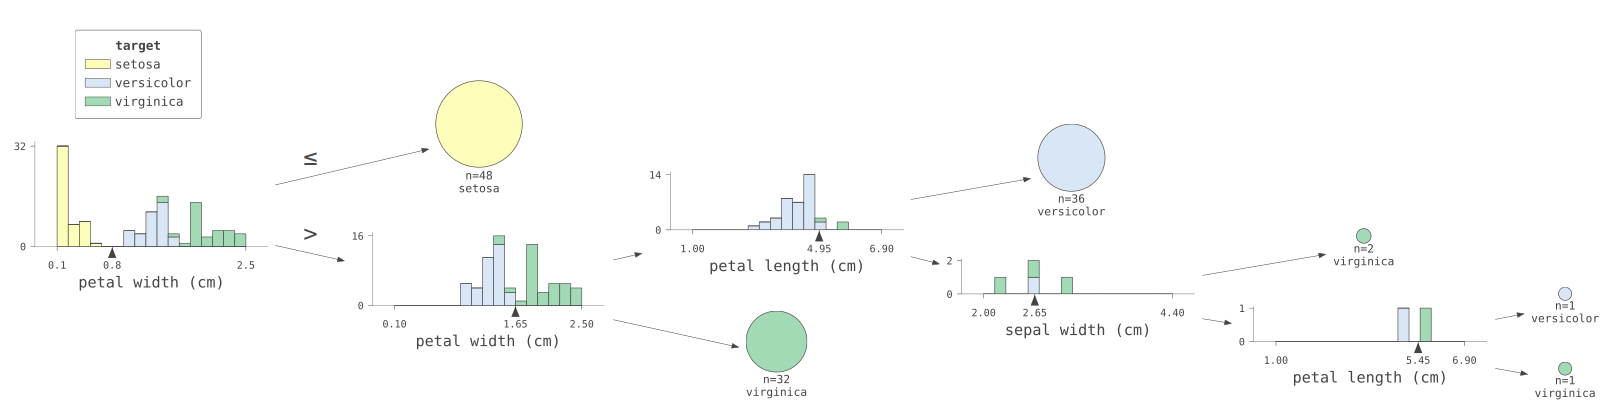

In [ ]:

viz_model = dtreeviz.model(tree_clf, X_train, y_train,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))
viz_model.view(fontname="monospace", scale=1.7, orientation="LR")

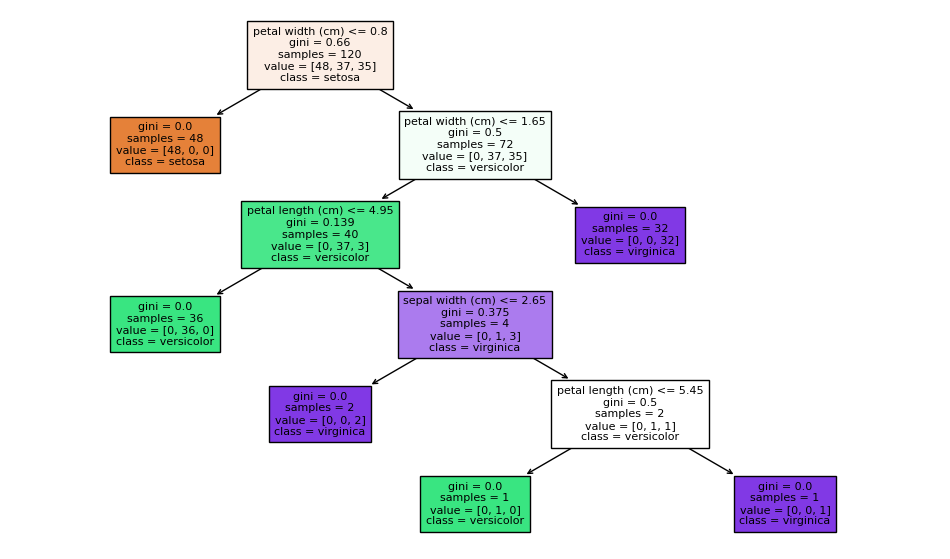

In [ ]:
plt.figure(figsize=(12, 7))

plot_tree(tree_clf, feature_names=iris.feature_names, class_names=list(iris.target_names), filled=True, fontsize=8)
plt.show()

>4. En el arbol de decisión anterior, ¿es posible que se esté dando overfitting? ¿por qué? ¿cómo se podría solucionar?

Existe overfitting porque entrenamos con el conjunto train y cuando calculamos la desviación lo hacemos con el conjunto test ,si hubiesemos calculado la desviación con el conjunto de entrenamiento no pasaría esto.
"mae = mean_absolute_error(y_test, y_pred)" es esto el problema deberíamos usar el conjunto y_train y no y_test.

## Experiencia vs salario

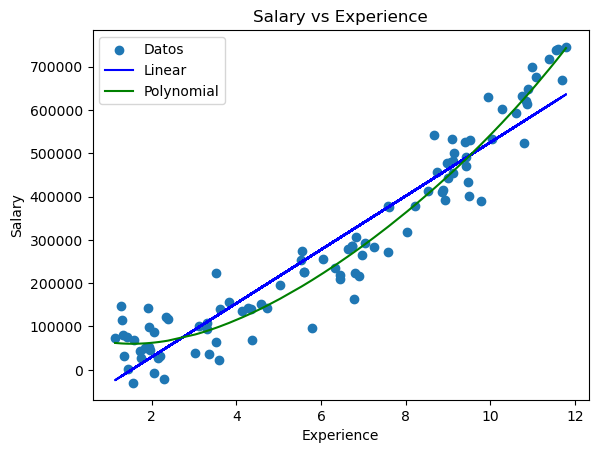

Root Mean Squared Error (Linear): 68217.32804732288
Root Mean Squared Error (Polynomial): 49273.90709808602


In [ ]:
df = pd.read_csv("data/salaries3.csv")

X = df[['YearsExperience']].values
y = df['Salary'].values

plt.scatter(X, y, label='Datos')

# Linear Regression
linear_regressor = LinearRegression().fit(X, y)
y_pred_linear = linear_regressor.predict(X)

plt.plot(X, y_pred_linear, color='blue', label='Linear')

# Polynomial Regression
poly_features = PolynomialFeatures(degree=4)
x_poly = poly_features.fit_transform(X)
poly_regressor = LinearRegression().fit(x_poly, y)
y_pred_poly = poly_regressor.predict(x_poly)

X_sorted, y_pred_poly_sorted = zip(*sorted(zip(X, y_pred_poly)))

plt.plot(X_sorted, y_pred_poly_sorted, color='green', label='Polynomial')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

print(f"Root Mean Squared Error (Linear): {np.sqrt(mean_squared_error(y, y_pred_linear))}")
print(f"Root Mean Squared Error (Polynomial): {np.sqrt(mean_squared_error(y, y_pred_poly))}")

>5. El anterior código realiza una regresión lineal simple y otra polinómica sobre los mismos datos.
¿Cuál de los dos modelos tiene mejor rendimiento? ¿Cómo podríamos tener una mejor medida de rendimiento de cada uno? ¿Por qué?

A simple vista ya podemos ver que el modelo con mejor rendimiento es el de regresión polinómica.Podríamos tener un mejor rendimiento calculando con OLS(Ordinary Least Squares).Porque con este método minimiza la distancia entre los valores reales y  los valores predichos





